# Value at Risk

## Variance-covariance example for SAP

In [1]:
from datetime import datetime
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as scs
import pandas_datareader.data as web

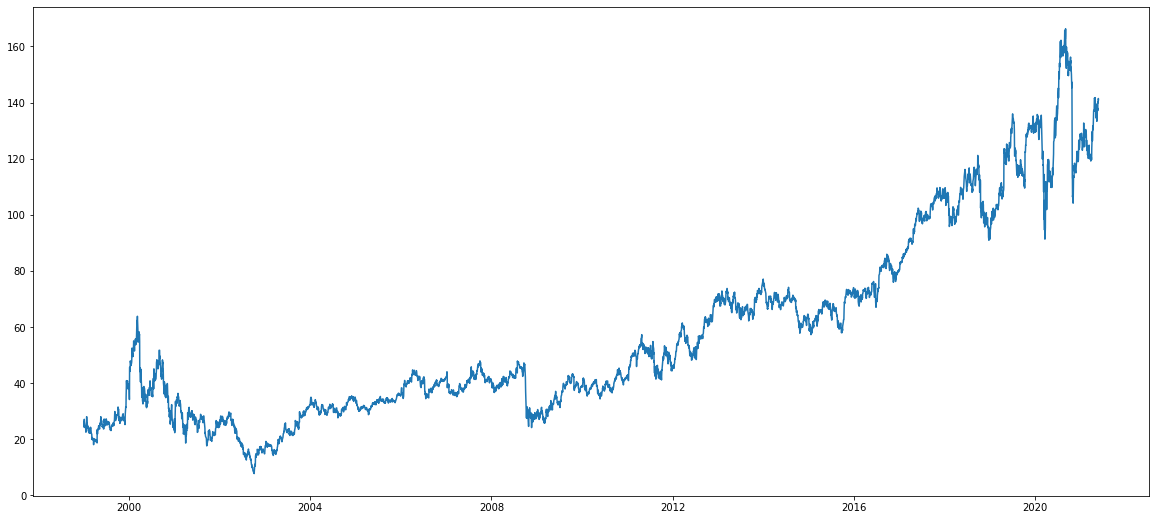

In [2]:
today = date.today()
from_date = datetime(1999,1,1)
sap = web.DataReader("SAP", 'yahoo', from_date, today)
plt.subplots(figsize=(20, 9))
plt.plot(sap["Adj Close"]);

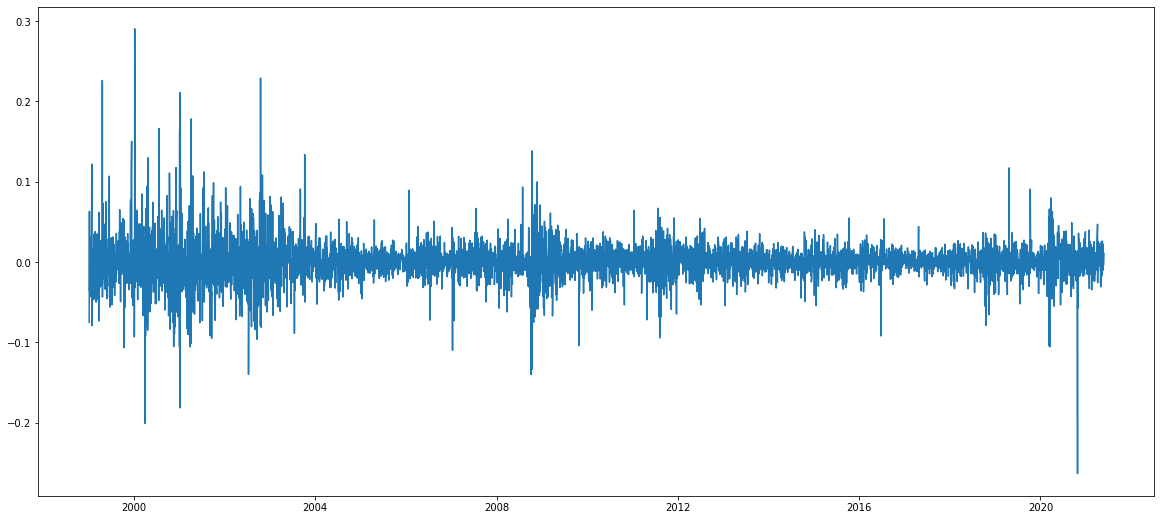

In [3]:
sap['Log_ret'] = np.log(sap["Adj Close"]).diff()
plt.subplots(figsize=(20, 9))
plt.plot(sap["Log_ret"]);

In [4]:
def var_cov_var(P, c, mu, sigma):
    """
    Variance-Covariance calculation of daily Value-at-Risk
    using confidence level c, with mean of returns mu
    and standard deviation of returns sigma, on a portfolio
    of value P. Adapted from quantstart.com
    """
    alpha = scs.norm.ppf(1-c, mu, sigma)
    return P - P*(alpha + 1)

P = 1e6   # 1,000,000 USD
c = 0.99  # 99% confidence interval
mu = np.mean(sap['Log_ret']['1999-01-01':'2021-01-01'])
sigma = np.std(sap['Log_ret']['1999-01-01':'2021-01-01'])

var = var_cov_var(P, c, mu, sigma)
print("Value-at-Risk:", var)

Value-at-Risk: 56535.53343551152


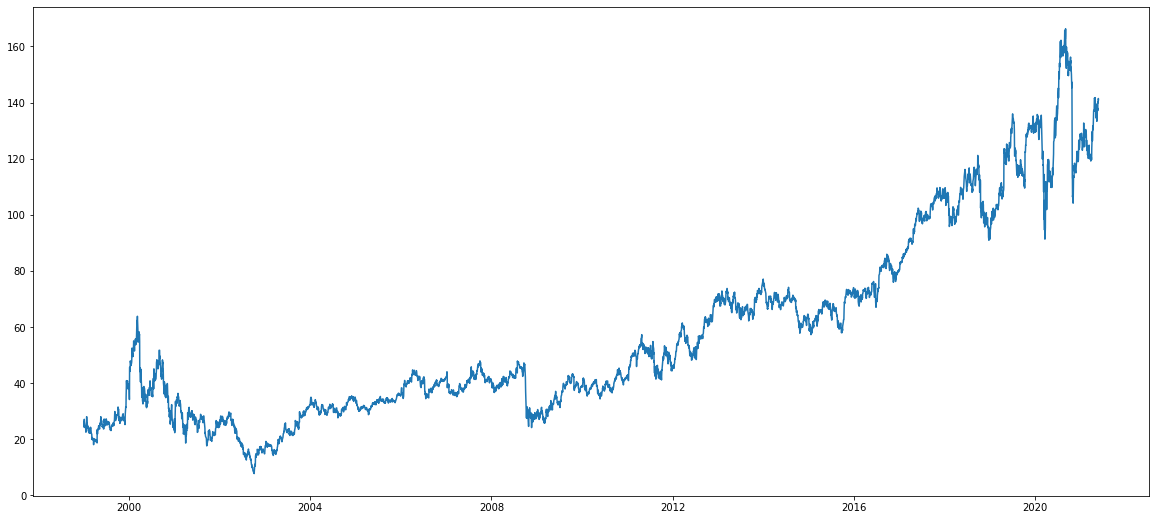

In [5]:
fig, ax = plt.subplots(figsize=(20, 9))
plt.plot(sap['Adj Close']);

## Check corona days

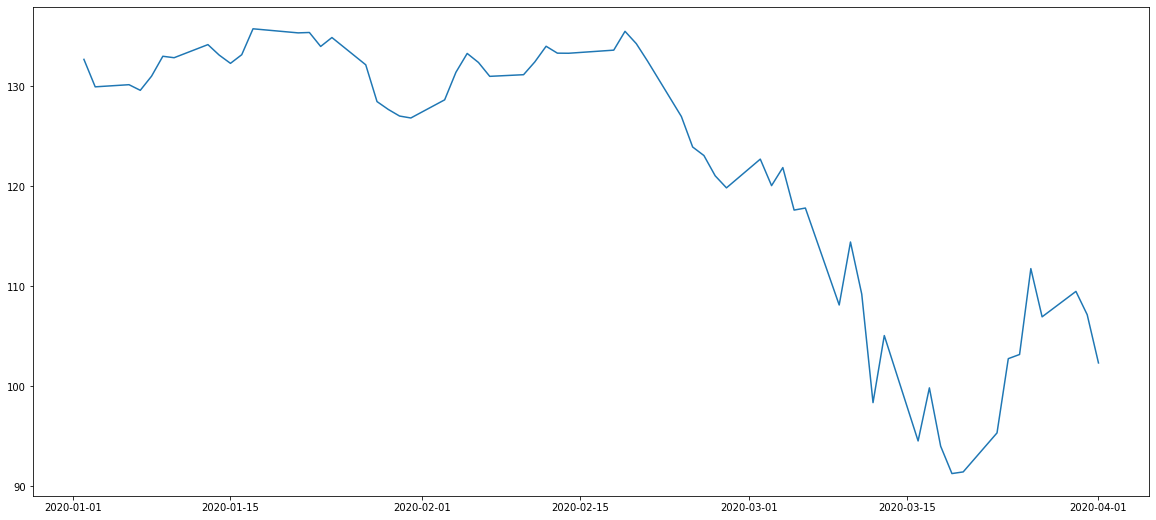

In [6]:
fig, ax = plt.subplots(figsize=(20, 9))
plt.plot(sap['Adj Close']['2020-01-01':'2020-04-01']);

In [7]:
mu = np.mean(sap['Log_ret']['2020-01-01':'2020-04-01'])
sigma = np.std(sap['Log_ret']['2020-01-01':'2020-04-01'])

var = var_cov_var(P, c, mu, sigma)
print("Value-at-Risk:", var)

Value-at-Risk: 84018.53659856261
